In [151]:
import numpy as np
from sklearn.datasets import make_regression as mr 
from sklearn.model_selection import train_test_split as tts 
from sklearn.metrics import mean_squared_error as msee


import matplotlib.pyplot as plt
import numpy as np 
from scipy.spatial.distance import pdist,squareform 
from scipy.linalg import eigh
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures

In [152]:
class LinearRegressionSGD:
    def __init__(self,eta=0.1,n_iters=1000):
        self.eta=eta 
        self.n_iters=n_iters 


    def fit(self,X,y):
        n_samples,n_feature=X.shape

        rgen=np.random.RandomState(seed=1)
        self.w_=rgen.normal(loc=0.0,scale=0.1,
                            size=n_feature)
        
        self.b_=rgen.normal(loc=0.0,scale=0.1,
                            size=1)
        

        for _ in range(self.n_iters):
            for idx,x in enumerate(X):
                y_pred=self.net_input(x)

                error=y_pred-y[idx] 

                self.update(error,x)


        
        return self 
    

    def net_input(self,x):
        return np.dot(x,self.w_)+self.b_ 
    

    def update(self,error,x):
        self.w_=self.w_+(-self.eta*(x.T.dot(error)))
        self.b_=self.b_+(-self.eta*error)


    def predict(self,X):
        return self.net_input(X)    

In [153]:

X,y=mr(n_samples=100,n_features=1,random_state=1234,noise=10)
X_train,X_test,y_train,y_test=tts(X,y,test_size=0.2,random_state=1234)

In [154]:
model=LinearRegressionSGD(eta=0.1,n_iters=1000)
model.fit(X_train,y_train)

In [155]:
y_pred=model.predict(X_test)

def mse(y_pred,y):
    return np.mean((y_pred-y)**2)


mse(y_pred,y_test)
# msee(y_pred,y_test)

119.20179573538128

In [156]:
y_pred,y_test

(array([  -7.30838551,  124.27584072,    3.72224012,  -88.11919167,
         -27.83930853,   81.95229591,   21.94934735,  -16.72160098,
        -327.7132439 ,  -52.0758848 ,  189.92786781,  100.01955284,
        -205.49263396,  -48.70067063,   81.57023816,  -37.76818863,
          45.00153167,   98.96554432,  187.82175318, -141.11003142]),
 array([   5.70200296,  130.94571618,    5.74774591,  -89.70183082,
         -28.20963397,   64.22848636,   33.0135877 ,  -26.59879644,
        -305.24176082,  -39.54523567,  177.18944766,   92.13358154,
        -200.11229699,  -37.05032162,   73.16001615,  -59.66666232,
          42.45155066,   96.94077257,  184.09251914, -139.233723  ]))

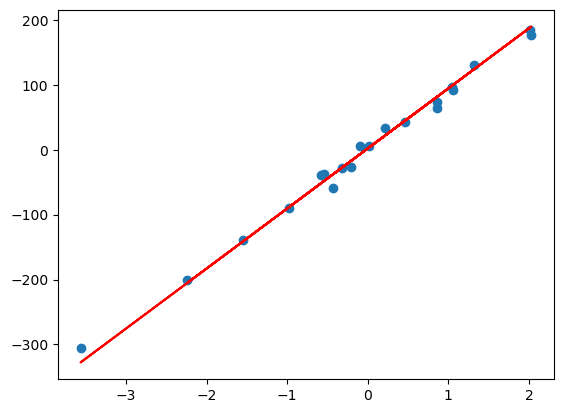

In [157]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_pred,"r")     

In [158]:
y_pred_train=model.predict(X_train)

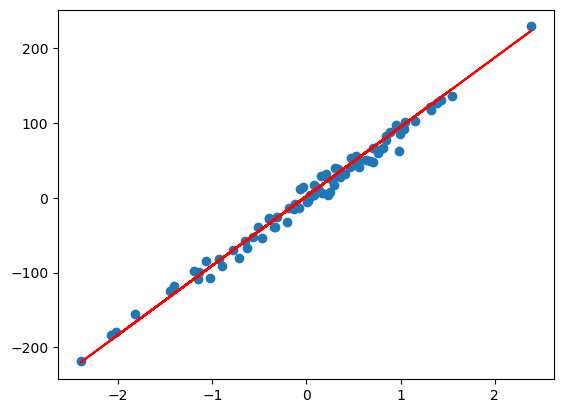

In [159]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_pred_train,"r")

In [160]:
mse(model.predict(X_train),y_train)

88.50184664964647